# Credit Card Transaction Fraud Detection

## Data Cleaning

In [1]:
import pandas as pd
from statistics import mode
import timeit
import datetime as dt
import numpy as np
data = pd.read_csv('card transactions.csv',dtype={'Cardnum':str,'Merch zip':str}).drop(['Unnamed: 10','Unnamed: 11','Unnamed: 12','Unnamed: 13','Unnamed: 14','Unnamed: 15','Unnamed: 16','Unnamed: 17'], axis=1)


In [2]:
data = data.drop(52714).reset_index().drop('index', axis=1)
data = data[data.Transtype == 'P']
data.shape

(96397, 10)

### Merch State

In [3]:
ls = data[['Merch zip', 'Merch state']]

#ls[pd.isnull(ls['Merch state']) & pd.notnull(ls['Merch zip'])]
ls = ls.drop_duplicates()
ls = ls[pd.notnull(ls['Merch state']) & pd.notnull(ls['Merch zip'])]
dic = dict(ls.values.tolist())

In [4]:
for i in data[pd.isnull(data['Merch state'])&pd.notnull(data['Merch zip'])].index.to_list():
    z = int(data.loc[i, 'Merch zip']) 
    if ((z >= 600) & (z <= 799)) | ((z >= 900) & (z <= 999)):
        data.loc[i, 'Merch state'] = 'PR'
    else:
        try:
            data.loc[i, 'Merch state'] = dic[data.loc[i, 'Merch zip']]
        except: pass

In [5]:
temp = data[pd.isnull(data['Merch state'])&pd.notnull(data['Merch description'])]
temp_ls = dict()
for i in temp['Merch description'].unique():
    if pd.notnull(mode(data[data['Merch description'] == i]['Merch state'])):
        temp_ls[i] = mode(data[data['Merch description'] == i]['Merch state'])

In [6]:
for i in data[pd.isnull(data['Merch state'])&pd.notnull(data['Merch description'])].index.to_list():
    z = data.loc[i, 'Merch description']
    if z in temp_ls.keys():
        data.loc[i, 'Merch state'] = temp_ls[z]

In [7]:
for i in data[pd.isnull(data['Merch state'])].index.to_list():
    data.loc[i, 'Merch state'] = 'Unk'

In [8]:
data.loc[44407, 'Merch state'] = 'CA'
data.loc[36538, 'Merch state'] = 'CA'
data.loc[36789, 'Merch state'] = 'CA'
data.loc[38034, 'Merch state'] = 'TX'
data.loc[59831, 'Merch state'] = 'NY'
data.loc[60002, 'Merch state'] = 'NY'
data.loc[60034, 'Merch state'] = 'NY'
data.loc[66156, 'Merch state'] = 'NY'
data.loc[66251, 'Merch state'] = 'NY'
data.loc[70550, 'Merch state'] = 'VI'
data.loc[70587, 'Merch state'] = 'VI'
data.loc[82781, 'Merch state'] = 'GA'
data.loc[90258, 'Merch state'] = 'KY'

### Merchnum

In [9]:
for i in data[data.Merchnum == '0'].index.to_list():
    data.loc[i, 'Merchnum'] = None

In [10]:
temp = data[pd.isnull(data['Merchnum'])&pd.notnull(data['Merch description'])]
temp_ls = dict()
for i in temp['Merch description'].unique():
    if pd.notnull(mode(data[data['Merch description'] == i]['Merchnum'])):
        temp_ls[i] = mode(data[data['Merch description'] == i]['Merchnum'])
        
for i in data[pd.isnull(data['Merchnum'])&pd.notnull(data['Merch description'])].index.to_list():
    z = data.loc[i, 'Merch description']
    if z in temp_ls.keys():
        data.loc[i, 'Merchnum'] = temp_ls[z]

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96397 entries, 0 to 96751
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Recnum             96397 non-null  int64  
 1   Cardnum            96397 non-null  object 
 2   Date               96397 non-null  object 
 3   Merchnum           93467 non-null  object 
 4   Merch description  96397 non-null  object 
 5   Merch state        96397 non-null  object 
 6   Merch zip          92097 non-null  object 
 7   Transtype          96397 non-null  object 
 8   Amount             96397 non-null  float64
 9   Fraud              96397 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 10.1+ MB


In [11]:
for i in data[pd.isnull(data['Merchnum'])].index.to_list():
    data.loc[i, 'Merchnum'] = 'Unk'
    
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96397 entries, 0 to 96751
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Recnum             96397 non-null  int64  
 1   Cardnum            96397 non-null  object 
 2   Date               96397 non-null  object 
 3   Merchnum           96397 non-null  object 
 4   Merch description  96397 non-null  object 
 5   Merch state        96397 non-null  object 
 6   Merch zip          92097 non-null  object 
 7   Transtype          96397 non-null  object 
 8   Amount             96397 non-null  float64
 9   Fraud              96397 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 10.1+ MB


### Merch zip

In [12]:
temp = data[pd.isnull(data['Merch zip'])&(data['Merchnum'] != 'Unk')]
temp_ls = dict()
for i in temp['Merchnum'].unique():
    if pd.notnull(mode(data[data['Merchnum'] == i]['Merch zip'])):
        temp_ls[i] = mode(data[data['Merchnum'] == i]['Merch zip'])
        
for i in data[pd.isnull(data['Merch zip'])&pd.notnull(data['Merchnum'])].index.to_list():
    z = data.loc[i, 'Merchnum']
    if z in temp_ls.keys():
        data.loc[i, 'Merch zip'] = temp_ls[z]

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96397 entries, 0 to 96751
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Recnum             96397 non-null  int64  
 1   Cardnum            96397 non-null  object 
 2   Date               96397 non-null  object 
 3   Merchnum           96397 non-null  object 
 4   Merch description  96397 non-null  object 
 5   Merch state        96397 non-null  object 
 6   Merch zip          92840 non-null  object 
 7   Transtype          96397 non-null  object 
 8   Amount             96397 non-null  float64
 9   Fraud              96397 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 10.1+ MB


In [13]:
for i in data[pd.isnull(data['Merch zip'])].index.to_list():
    data.loc[i, 'Merch zip'] = 'Unk'
    
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96397 entries, 0 to 96751
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Recnum             96397 non-null  int64  
 1   Cardnum            96397 non-null  object 
 2   Date               96397 non-null  object 
 3   Merchnum           96397 non-null  object 
 4   Merch description  96397 non-null  object 
 5   Merch state        96397 non-null  object 
 6   Merch zip          96397 non-null  object 
 7   Transtype          96397 non-null  object 
 8   Amount             96397 non-null  float64
 9   Fraud              96397 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 10.1+ MB


In [14]:
for i in data[data['Merch description']=='RETAIL CREDIT ADJUSTMENT'].index.tolist():
    data.loc[i, 'Merchnum'] == 'Unk'
    data.loc[i, 'Merch state'] == 'Unk'
    data.loc[i, 'Merch zip'] == 'Unk'
for i in data[data['Merch description']=='RETAIL DEBIT ADJUSTMENT'].index.tolist():
    data.loc[i, 'Merchnum'] == 'Unk'
    data.loc[i, 'Merch state'] == 'Unk'
    data.loc[i, 'Merch state'] == 'Unk'
    

## Variables Creation

In [15]:
df = data.copy()
entities = ['Cardnum', 'Merchnum', 'card_merch', 'card_zip', 'card_state', 'merch_zip', 'merch_state', 'amount_bin_merch', 'amount_bin_card']

df['card_merch'] = df['Cardnum'] + df['Merchnum']
df['card_zip'] = df['Cardnum'] + df['Merch zip']
df['card_state'] = df['Cardnum'] + df['Merch state']
df['merch_zip'] = df['Merchnum'] + df['Merch zip']
df['merch_state'] = df['Merchnum'] + df['Merch state']
#df3 = df1.copy()
df['amount_bin'] = pd.qcut(df['Amount'], 10, labels=False).astype(str)
df['amount_bin_merch'] = df['amount_bin'] + df['Merchnum']
df['amount_bin_card'] = df['amount_bin'] + df['Cardnum']

#entities = ['amount_bin_merch', 'amount_bin_card']
df.Date = pd.to_datetime(df.Date)
df1 = df.copy()
final = df.copy()
df1['check_date'] = df1.Date
df1['check_record'] = df1.Recnum



In [16]:
start = timeit.default_timer()
for entity in entities:    
    try: print('Run time for the last entity ----------------- {}s'.format(timeit.default_timer() - st))
    except: print('')
    st = timeit.default_timer()    
    ## Day-since variables:   
    df_l = df1[['Recnum', 'Date', entity]]
    df_r = df1[['check_record', 'check_date', entity, 'Amount']]    
    temp = pd.merge(df_l, df_r, left_on = entity, right_on = entity)   
    temp1 = temp[temp.Recnum > temp.check_record][['Recnum','Date','check_date']]\
                                                   .groupby('Recnum')[['Date', 'check_date']].last()
    mapper = (temp1.Date - temp1.check_date).dt.days
    final[entity + '_day_since'] = final.Recnum.map(mapper)
    final[entity + '_day_since'].fillna(365, inplace = True)
    #final[entity + '_day_since'].fillna((final.Date - pd.to_datetime('2010-01-01')).dt.days, inplace = True)
    print('\n' + entity + '_day_since ---> Done')   
    ## Frequency & Amount variables:   
    for time in [0,1,3,7,14,30]:       
        temp2 = temp[(temp.check_date >= (temp.Date - dt.timedelta(time))) &\
                       (temp.Recnum >= temp.check_record)][['Recnum', entity, 'Amount']]       
        col_name = entity + '_count_' + str(time)    
        mapper2 = temp2.groupby('Recnum')[entity].count()      
        final[col_name] = final.Recnum.map(mapper2)        
        print(col_name + ' ---> Done')       
        final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())
        final[entity + '_max_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].max())
        final[entity + '_med_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].median())
        final[entity + '_total_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].sum())
        final[entity + '_actual/avg_' + str(time)] = final['Amount'] / final[entity + '_avg_' + str(time)]
        final[entity + '_actual/max_' + str(time)] = final['Amount'] / final[entity + '_max_' + str(time)]
        final[entity + '_actual/med_' + str(time)] = final['Amount'] / final[entity + '_med_' + str(time)]
        final[entity + '_actual/toal_' + str(time)] = final['Amount'] / final[entity + '_total_' + str(time)]       
        print(entity + ' amount variables over past ' + str(time) + ' ---> Done')

print('Total run time: {}mins'.format((timeit.default_timer() - start)/60))




Cardnum_day_since ---> Done
Cardnum_count_0 ---> Done
Cardnum amount variables over past 0 ---> Done
Cardnum_count_1 ---> Done
Cardnum amount variables over past 1 ---> Done
Cardnum_count_3 ---> Done
Cardnum amount variables over past 3 ---> Done
Cardnum_count_7 ---> Done
Cardnum amount variables over past 7 ---> Done
Cardnum_count_14 ---> Done
Cardnum amount variables over past 14 ---> Done
Cardnum_count_30 ---> Done
Cardnum amount variables over past 30 ---> Done
Run time for the last entity ----------------- 6.738957976922393s

Merchnum_day_since ---> Done
Merchnum_count_0 ---> Done
Merchnum amount variables over past 0 ---> Done
Merchnum_count_1 ---> Done
Merchnum amount variables over past 1 ---> Done
Merchnum_count_3 ---> Done
Merchnum amount variables over past 3 ---> Done
Merchnum_count_7 ---> Done
Merchnum amount variables over past 7 ---> Done
Merchnum_count_14 ---> Done
Merchnum amount variables over past 14 ---> Done
Merchnum_count_30 ---> Done
Merchnum amount variables o

In [17]:
start = timeit.default_timer()
# velocity change variables
for ent in entities:
    for d in ['0', '1']:
        for dd in ['7', '14', '30']:
            final[ent + '_count_' + d + '_by_' + dd] =\
            final[ent + '_count_' + d]/(final[ent + '_count_' + dd])/float(dd)
            final[ent + '_amount_'+ d + '_by_' + dd] =\
            final[ent + '_total_' + d]/(final[ent + '_total_' + dd])/float(dd)
            
print('run time: {}s'.format(timeit.default_timer() - start))


run time: 0.4880852848291397s


In [18]:
final.columns

Index(['Recnum', 'Cardnum', 'Date', 'Merchnum', 'Merch description',
       'Merch state', 'Merch zip', 'Transtype', 'Amount', 'Fraud',
       ...
       'amount_bin_card_count_0_by_14', 'amount_bin_card_amount_0_by_14',
       'amount_bin_card_count_0_by_30', 'amount_bin_card_amount_0_by_30',
       'amount_bin_card_count_1_by_7', 'amount_bin_card_amount_1_by_7',
       'amount_bin_card_count_1_by_14', 'amount_bin_card_amount_1_by_14',
       'amount_bin_card_count_1_by_30', 'amount_bin_card_amount_1_by_30'],
      dtype='object', length=621)

### Target Encoding

In [19]:
df2 = df[df.Date <= '2010-08-31']
c = 4
nmid = 20
fraud_avg = df2['Fraud'].mean()
fraud_state = df2.groupby('Merch state')['Fraud'].mean()
num_instances_state = df2.groupby('Merch state').size()
fraud_state_smooth = fraud_avg + (fraud_state - fraud_avg) / (1 + np.exp(- (num_instances_state - nmid)/c))
df['state_risk'] = df['Merch state'].map(fraud_state_smooth)

In [20]:
df['weekday'] = df.Date.dt.day_name()
df2 = df[df.Date <= '2010-08-31']
fraud_weekday = df2.groupby('weekday')['Fraud'].mean()
num_instances_weekday = df2.groupby('weekday').size()
fraud_weekday_smooth = fraud_avg + (fraud_weekday - fraud_avg) / (1 + np.exp(- (num_instances_weekday - nmid)/c))
df['weekday_risk'] = df['weekday'].map(fraud_weekday_smooth)
final_ = pd.merge(final, df[['state_risk', 'weekday', 'weekday_risk']], left_index=True, right_index=True)
final_vars = final_.drop(['Recnum', 'Cardnum', 'Date', 'Merchnum', 'Merch description', 
                         'Merch state', 'Merch zip', 'Transtype', 'Amount', 'Fraud',], axis = 1)

## Feature Selection

### Filter

In [3]:
from scipy import stats as sps
from random import random

In [33]:
data = data.reset_index()
data['Date'] = pd.to_datetime(data['Date'])


In [86]:
mydata = final_vars[(data['Date'] > '2010-01-14')&(data['Date']  < '2010-09-01')]
mydata['RANDOM'] = [random() for i in range(len(mydata))]
goods = mydata[mydata.Fraud == 0]
bads = mydata[mydata.Fraud == 1]

<ipython-input-86-08c01f3a3acf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mydata['RANDOM'] = [random() for i in range(len(mydata))]


In [87]:
# Calculate univariate KS
KSFDR = pd.DataFrame({'ks':np.zeros(len(mydata.columns))})
i = 0
for column in mydata.columns:
    KSFDR['ks'][i] = sps.ks_2samp(goods[column],bads[column])[0]
    i = i+1
# KSFDR.index = mydata.columns

In [88]:
# Calculate univariate FDR@3%
numbads = len(bads)
topRows = int(round(len(data)*0.03))
j = 0
for column in mydata.columns:
    temp = mydata.sort_values(column,ascending=False)
    temp1 = temp.head(topRows)
    temp2 = temp.tail(topRows)
    needed1 = temp1.loc[:,'Fraud']
    needed2 = temp2.loc[:,'Fraud']
    FDR1 = sum(needed1)/numbads
    FDR2 = sum(needed2)/numbads
    FDRate = np.maximum(FDR1,FDR2)
    KSFDR.loc[j, 'FDR'] = FDRate
    j = j +1


In [89]:
# Sort by average rank
KSFDR.index = mydata.columns
KSFDR['rank_ks'] = KSFDR['ks'].rank(ascending = True)
KSFDR['rank_FDR'] = KSFDR['FDR'].rank(ascending = True)
KSFDR['average_rank'] = (KSFDR['rank_ks'] + KSFDR['rank_FDR']) / 2
KSFDR.sort_values(by=['average_rank'], ascending=False, inplace=True)
KSFDR

,ks,FDR,rank_ks,rank_FDR,average_rank
Fraud,1.000000,1.000000,616.0,616.0,616.00
card_state_total_7,0.664419,0.670043,612.0,613.0,612.50
card_zip_total_7,0.671108,0.657019,614.0,610.0,612.00
card_merch_total_14,0.660560,0.681621,608.0,615.0,611.50
card_state_total_3,0.662650,0.664255,610.0,611.0,610.50
...,...,...,...,...,...
Cardnum_actual/toal_14,0.132744,0.015919,53.0,26.5,39.75
amount_bin_merch_count_0_by_30,0.131544,0.014472,50.0,23.0,36.50
merch_zip_count_1_by_30,0.099254,0.024602,24.0,44.0,34.00
card_zip_amount_1_by_14,0.045020,0.031838,2.0,64.0,33.00


### FDR for FS

In [85]:
def fdr(classifier, x, y, cutoff=0.03):
# Calculates FDR score for the given classifier on dataset x and y with cutoff value
# get the probability list from the given classifier
    return fdr_prob(y, classifier.predict_proba(x), cutoff)
def fdr_prob(y, y_prob, cutoff=0.03):
    if len(y_prob.shape) != 1:    # sometimes the proba list can contain many columns, one for each category
        y_prob = y_prob[:, -1:]   # only the last one (fraud_label==1) is used here.
    num_fraud = len(y[y == 1])    # count the total nunber of frauds   
# sort the proba list from high to low while retain the true (not predicted) fraud label
    sorted_prob = np.asarray(sorted(zip(y_prob, y), key=lambda x: x[0], reverse=True))
    cutoff_bin = sorted_prob[0:int(len(y) * cutoff), 1:]  # 3% cutoff
# return the FDR score (#fraud_in_cutoff / #total_fraud)
    return len(cutoff_bin[cutoff_bin == 1]) / num_fraud 


### Forward selection:


In [120]:
top_80 = KSFDR.iloc[1:81].index.to_list()
mydata_ = mydata[top_80]

In [152]:
# WRAPPER - forward selection
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestClassifier
nfeatures = len(mydata_.columns)
clf = RandomForestClassifier(n_estimators=5, n_jobs=-1)
sfs = SFS(clf,k_features=30,forward=True,verbose=2,scoring=fdr,cv=4,n_jobs=-1)
# sfs = SFS(clf,k_features=1,forward=False,verbose=2,scoring=fdr,cv=2,n_jobs=-1)
sfs.fit(mydata_,mydata.Fraud)



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   48.3s finished

[2021-05-18 16:57:23] Features: 1/30 -- score: 0.4239397096383922[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done  79 out of  79 | elapsed:   45.9s finished

[2021-05-18 16:58:09] Features: 2/30 -- score: 0.539756687726845[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done  78 out of  78 | elapsed:   40.8s finished

[2021-05-18 16:58:50] Features: 3/30 -- score: 0.5672469417932517[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done  77 out of

SequentialFeatureSelector(cv=4,
                          estimator=RandomForestClassifier(n_estimators=5,
                                                           n_jobs=-1),
                          k_features=30, n_jobs=-1,
                          scoring=<function fdr at 0x7f506ca689d0>, verbose=2)

In [125]:
# The code below makes a list of the top 30 variables, but not in order of multivariate importance. To get the order need to look at the dataframe vars_FS.
vars_FS = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
vars_30 = list(vars_FS.loc[30, 'feature_names'])
vars_30

['card_zip_total_7',
 'card_state_total_3',
 'card_merch_total_7',
 'card_zip_total_30',
 'card_merch_total_3',
 'card_merch_total_1',
 'card_zip_total_1',
 'card_state_max_7',
 'Cardnum_total_3',
 'card_state_max_14',
 'card_zip_max_14',
 'Cardnum_total_7',
 'card_zip_total_0',
 'card_zip_max_30',
 'card_merch_max_30',
 'merch_zip_total_1',
 'card_merch_max_1',
 'card_state_max_1',
 'merch_state_total_3',
 'amount_bin_merch_total_7',
 'Cardnum_total_0',
 'amount_bin_card_total_3',
 'Merchnum_total_3',
 'amount_bin_card_total_7',
 'Cardnum_max_3',
 'card_state_avg_3',
 'card_state_avg_7',
 'amount_bin_merch_total_0',
 'merch_zip_total_7',
 'Cardnum_max_14']

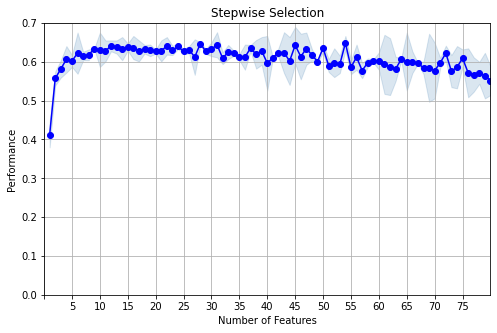

In [134]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev', figsize=(8, 5))
plt.xticks(np.arange(0, len(mydata_.columns), step=5))
plt.ylim([0., .7])
plt.xlim(0, len(mydata_.columns))
plt.title('Stepwise Selection')
plt.grid()
plt.savefig('FS_fdr.png')
plt.show()

In [ ]:
res = []
for i in vars_FS.loc[:30, 'feature_names'].values:
    for j in i:
        if j not in res:
            res.append(j)
res

In [23]:
model_data = final_[['Recnum', 'Cardnum', 'Date','Merchnum', 'Amount', 'Fraud', 
                     'card_zip_total_7',
                        'card_state_max_7',
                        'amount_bin_card_total_7',
                        'Cardnum_total_3',
                        'card_merch_total_1', 
                        'card_zip_max_14',
                        'card_state_avg_3',
                        'card_zip_total_1',
                        'card_state_avg_7',
                        'Cardnum_total_0',
                        'card_merch_total_7',
                        'Cardnum_total_7', 
                        'card_merch_max_1', 
                        'merch_state_total_3', 
                        'card_zip_total_0', 
                        'card_merch_total_3', 
                        'card_merch_max_30', 
                        'Cardnum_max_14', 
                        'merch_zip_total_1', 
                        'Merchnum_total_3', 
                        'merch_zip_total_7', 
                        'amount_bin_merch_total_0', 
                        'card_state_max_14', 
                        'card_state_total_3', 
                        'card_zip_total_30', 
                     'card_state_max_1', 
                     'Cardnum_max_3', 
                     'card_zip_max_30',
                     'amount_bin_merch_total_7',
                     'amount_bin_card_total_3' ]]

## Model Building

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#import statsmodels.formula.api as smf
import xgboost as xgb
from sklearn import metrics, tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (
    GridSearchCV,
    ShuffleSplit,
    StratifiedShuffleSplit,
    train_test_split,
)
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from statsmodels.genmod.families import Binomial
from statsmodels.genmod.families.links import logit



In [4]:
data_trntst = model_data[model_data.Date < '2010-09-01']
data_oot = model_data[model_data.Date >= '2010-09-01']

x_trntst = data_trntst[['card_zip_total_7',
                        'card_state_max_7',
                        'amount_bin_card_total_7',
                        'Cardnum_total_3',
                        'card_merch_total_1', 
                        'card_zip_max_14',
                        'card_state_avg_3',
                        'card_zip_total_1',
                        'card_state_avg_7',
                        'Cardnum_total_0',
                        'card_merch_total_7',
                        'Cardnum_total_7', 
                        'card_merch_max_1', 
                        'merch_state_total_3', 
                        'card_zip_total_0', 
                        'card_merch_total_3', 
                        'card_merch_max_30', 
                        'Cardnum_max_14', 
                        'merch_zip_total_1', 
                        'Merchnum_total_3', 
                        'merch_zip_total_7', 
                        'amount_bin_merch_total_0', 
                        'card_state_max_14', 
                        'card_state_total_3', 
                        'card_zip_total_30', 
                         'card_state_max_1', 
                         'Cardnum_max_3', 
                         'card_zip_max_30',
                         'amount_bin_merch_total_7',
                         'amount_bin_card_total_3']]
y_trntst = data_trntst[['Fraud']]
x_oot = data_oot[['card_zip_total_7',
                    'card_state_max_7',
                    'amount_bin_card_total_7',
                    'Cardnum_total_3',
                    'card_merch_total_1', 
                    'card_zip_max_14',
                    'card_state_avg_3',
                    'card_zip_total_1',
                    'card_state_avg_7',
                    'Cardnum_total_0',
                    'card_merch_total_7',
                    'Cardnum_total_7', 
                    'card_merch_max_1', 
                    'merch_state_total_3', 
                    'card_zip_total_0', 
                    'card_merch_total_3', 
                    'card_merch_max_30', 
                    'Cardnum_max_14', 
                    'merch_zip_total_1', 
                    'Merchnum_total_3', 
                    'merch_zip_total_7', 
                    'amount_bin_merch_total_0', 
                    'card_state_max_14', 
                    'card_state_total_3', 
                    'card_zip_total_30', 
                     'card_state_max_1', 
                     'Cardnum_max_3', 
                     'card_zip_max_30',
                     'amount_bin_merch_total_7',
                     'amount_bin_card_total_3']]
y_oot = data_oot[['Fraud']]

### Best performed Model

In [8]:
# Final Model


max_depth=30
# variables = 30
n_estimators=150
max_features = 25
min_samples_split=200
min_samples_leaf=20

niter = 1
FDR3 = pd.DataFrame({'trn':np.zeros(10), 'tst':np.zeros(10), 'oot':np.zeros(10)})
#for niter in range(10):
X_trn, X_tst, Y_trn, Y_tst = train_test_split(x_trntst, y_trntst, test_size = .3)

model = RandomForestClassifier(
    n_estimators=n_estimators,
    max_depth=max_depth,
    max_features=max_features, 
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf

)

X_oot = x_oot.copy()
X_trn_eval = X_trn.copy()
X_tst_eval = X_tst.copy()
X_oot_eval = X_oot.copy()

model.fit(X_trn, Y_trn.values.ravel())
predictions = model.predict_proba(X_trn)[:, 1]

X_trn_eval['predicted'] = predictions
X_trn_eval['Fraud'] = Y_trn['Fraud']
topRows = int(round(X_trn_eval.shape[0]*0.03))
temp = X_trn_eval.sort_values('predicted', ascending=False).head(topRows)
needed = temp.loc[:, 'Fraud']
FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn_eval.loc[:, 'Fraud'])

predictions = model.predict_proba(X_tst)[:, 1]

X_tst_eval['predicted'] = predictions
X_tst_eval['Fraud'] = Y_tst['Fraud']
topRows = int(round(X_tst_eval.shape[0]*0.03))
temp = X_tst_eval.sort_values('predicted', ascending=False).head(topRows)
needed = temp.loc[:, 'Fraud']
FDR3.loc[niter, 'tst'] = sum(needed)/sum(X_tst_eval.loc[:, 'Fraud'])

predictions = model.predict_proba(X_oot)[:, 1]

X_oot_eval['predicted'] = predictions
X_oot_eval['Fraud'] = y_oot['Fraud']
topRows = int(round(X_oot_eval.shape[0]*0.03))
temp = X_oot_eval.sort_values('predicted', ascending=False).head(topRows)
needed = temp.loc[:, 'Fraud']
FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot_eval.loc[:, 'Fraud'])
print(FDR3.loc[niter, 'trn'], FDR3.loc[niter, 'tst'], FDR3.loc[niter, 'oot'])

FDR3.mean()

0.868421052631579 0.7990430622009569 0.6797752808988764


trn    0.086842
tst    0.079904
oot    0.067978
dtype: float64

In [31]:
X_trn_sorted = X_trn_eval.sort_values('predicted',ascending = False).reset_index().reset_index()

import pyrsm as rsm
num_bad = len(X_trn_sorted.query('Fraud == 1'))
num_good = len(X_trn_sorted.query('Fraud == 0'))

X_trn_sorted['bin'] = rsm.xtile(X_trn_sorted["level_0"], 100)
train_results = pd.DataFrame(X_trn_sorted.query('bin < 21').groupby('bin')['Fraud'].count())
train_results['#_goods'] = list(X_trn_sorted.query('bin < 21').query('Fraud == 0').groupby('bin').count()['index'])
train_results['#_bads'] = train_results['Fraud'] - train_results['#_goods']
train_results['%_goods'] = (train_results['#_goods']/train_results['Fraud']).round(2)
train_results['%_bads'] = (train_results['#_bads']/train_results['Fraud']).round(2)
train_results['cum_recs'] = np.cumsum(list(X_trn_sorted.query('bin < 21').groupby('bin').count()['index']))
train_results['cum_goods'] = np.cumsum(train_results['#_goods'])
train_results['cum_bads'] = np.cumsum(train_results['#_bads'])
train_results['%_good'] = (train_results['cum_goods']/num_good).round(3)*100
train_results['FDR'] = (train_results['cum_bads']/num_bad).round(3)*100
train_results['KS'] = train_results['FDR'] - train_results['%_good']
train_results['FPR'] = (train_results['cum_goods']/train_results['cum_bads']).round(2)
train_results

,Fraud,#_goods,#_bads,%_goods,%_bads,cum_recs,cum_goods,cum_bads,%_good,FDR,KS,FPR
bin,,,,,,,,,,,,
1,484,176,308,0.36,0.64,484,176,308,0.4,62.7,62.3,0.57
2,483,410,73,0.85,0.15,967,586,381,1.2,77.6,76.4,1.54
3,483,431,52,0.89,0.11,1450,1017,433,2.1,88.2,86.1,2.35
4,484,466,18,0.96,0.04,1934,1483,451,3.1,91.9,88.8,3.29
5,483,459,24,0.95,0.05,2417,1942,475,4.1,96.7,92.6,4.09
6,483,471,12,0.98,0.02,2900,2413,487,5.0,99.2,94.2,4.95
7,484,482,2,1.00,0.00,3384,2895,489,6.1,99.6,93.5,5.92
8,483,482,1,1.00,0.00,3867,3377,490,7.1,99.8,92.7,6.89
9,483,483,0,1.00,0.00,4350,3860,490,8.1,99.8,91.7,7.88


In [32]:
X_tst_sorted = X_tst_eval.sort_values('predicted',ascending = False).reset_index().reset_index()

import pyrsm as rsm
num_bad = len(X_tst_sorted.query('Fraud == 1'))
num_good = len(X_tst_sorted.query('Fraud == 0'))

X_tst_sorted['bin'] = rsm.xtile(X_tst_sorted["level_0"], 100)
test_results = pd.DataFrame(X_tst_sorted.query('bin < 21').groupby('bin')['Fraud'].count())
test_results['#_goods'] = list(X_tst_sorted.query('bin < 21').query('Fraud == 0').groupby('bin').count()['index'])
test_results['#_bads'] = test_results['Fraud'] - test_results['#_goods']
test_results['%_goods'] = (test_results['#_goods']/test_results['Fraud']).round(2)
test_results['%_bads'] = (test_results['#_bads']/test_results['Fraud']).round(2)
test_results['cum_recs'] = np.cumsum(list(X_tst_sorted.query('bin < 21').groupby('bin').count()['index']))
test_results['cum_goods'] = np.cumsum(test_results['#_goods'])
test_results['cum_bads'] = np.cumsum(test_results['#_bads'])
test_results['%_good'] = (test_results['cum_goods']/num_good).round(3)*100
test_results['FDR'] = (test_results['cum_bads']/num_bad).round(3)*100
test_results['KS'] = test_results['FDR'] - test_results['%_good']
test_results['FPR'] = (test_results['cum_goods']/test_results['cum_bads']).round(2)
test_results

,Fraud,#_goods,#_bads,%_goods,%_bads,cum_recs,cum_goods,cum_bads,%_good,FDR,KS,FPR
bin,,,,,,,,,,,,
1,208,91,117,0.44,0.56,208,91,117,0.4,55.2,54.8,0.78
2,207,170,37,0.82,0.18,415,261,154,1.3,72.6,71.3,1.69
3,207,194,13,0.94,0.06,622,455,167,2.2,78.8,76.6,2.72
4,207,197,10,0.95,0.05,829,652,177,3.2,83.5,80.3,3.68
5,207,202,5,0.98,0.02,1036,854,182,4.2,85.8,81.6,4.69
6,207,205,2,0.99,0.01,1243,1059,184,5.2,86.8,81.6,5.76
7,207,197,10,0.95,0.05,1450,1256,194,6.1,91.5,85.4,6.47
8,208,206,2,0.99,0.01,1658,1462,196,7.1,92.5,85.4,7.46
9,207,206,1,1.00,0.00,1865,1668,197,8.1,92.9,84.8,8.47


In [33]:
X_oot_sorted = X_oot_eval.sort_values('predicted',ascending = False).reset_index().reset_index()

import pyrsm as rsm
num_bad = len(X_oot_sorted.query('Fraud == 1'))
num_good = len(X_oot_sorted.query('Fraud == 0'))

X_oot_sorted['bin'] = rsm.xtile(X_oot_sorted["level_0"], 100)
oot_results = pd.DataFrame(X_oot_sorted.query('bin < 21').groupby('bin')['Fraud'].count())
oot_results['#_goods'] = list(X_oot_sorted.query('bin < 21').query('Fraud == 0').groupby('bin').count()['index'])
oot_results['#_bads'] = oot_results['Fraud'] - oot_results['#_goods']
oot_results['%_goods'] = (oot_results['#_goods']/oot_results['Fraud']).round(2)
oot_results['%_bads'] = (oot_results['#_bads']/oot_results['Fraud']).round(2)
oot_results['cum_recs'] = np.cumsum(list(X_oot_sorted.query('bin < 21').groupby('bin').count()['index']))
oot_results['cum_goods'] = np.cumsum(oot_results['#_goods'])
oot_results['cum_bads'] = np.cumsum(oot_results['#_bads'])
oot_results['%_good'] = (oot_results['cum_goods']/num_good).round(3)*100
oot_results['FDR'] = (oot_results['cum_bads']/num_bad).round(3)*100
oot_results['KS'] = oot_results['FDR'] - oot_results['%_good']
oot_results['FPR'] = (oot_results['cum_goods']/oot_results['cum_bads']).round(2)
oot_results

,Fraud,#_goods,#_bads,%_goods,%_bads,cum_recs,cum_goods,cum_bads,%_good,FDR,KS,FPR
bin,,,,,,,,,,,,
1,274,122,152,0.45,0.55,274,122,152,0.5,42.7,42.2,0.80
2,274,205,69,0.75,0.25,548,327,221,1.2,62.1,60.9,1.48
3,273,249,24,0.91,0.09,821,576,245,2.1,68.8,66.7,2.35
4,274,269,5,0.98,0.02,1095,845,250,3.1,70.2,67.1,3.38
5,273,259,14,0.95,0.05,1368,1104,264,4.1,74.2,70.1,4.18
6,274,264,10,0.96,0.04,1642,1368,274,5.1,77.0,71.9,4.99
7,273,267,6,0.98,0.02,1915,1635,280,6.1,78.7,72.6,5.84
8,274,269,5,0.98,0.02,2189,1904,285,7.1,80.1,73.0,6.68
9,273,271,2,0.99,0.01,2462,2175,287,8.1,80.6,72.5,7.58


### Re-train the model on both training and testing data

In [9]:
max_depth=30
# variables = 30
n_estimators=150
max_features = 25
min_samples_split=200
min_samples_leaf=20

FDR3 = pd.DataFrame({'trn':np.zeros(10), 'tst':np.zeros(10), 'oot':np.zeros(10)})
#for niter in range(10):
X_trn, Y_trn = x_trntst, y_trntst

model = RandomForestClassifier(
    n_estimators=n_estimators,
    max_depth=max_depth,
    max_features=max_features, 
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf

)

X_oot = x_oot.copy()
X_trn_eval = X_trn.copy()
X_tst_eval = X_tst.copy()
X_oot_eval = X_oot.copy()

model.fit(X_trn, Y_trn.values.ravel())
predictions = model.predict_proba(X_trn)[:, 1]

X_trn_eval['predicted'] = predictions
X_trn_eval['Fraud'] = Y_trn['Fraud']
topRows = int(round(X_trn_eval.shape[0]*0.03))
temp = X_trn_eval.sort_values('predicted', ascending=False).head(topRows)
needed = temp.loc[:, 'Fraud']
FDR3.loc[niter, 'trn'] = sum(needed)/sum(X_trn_eval.loc[:, 'Fraud'])

predictions = model.predict_proba(X_oot)[:, 1]

X_oot_eval['predicted'] = predictions
X_oot_eval['Fraud'] = y_oot['Fraud']
topRows = int(round(X_oot_eval.shape[0]*0.03))
temp = X_oot_eval.sort_values('predicted', ascending=False).head(topRows)
needed = temp.loc[:, 'Fraud']
FDR3.loc[niter, 'oot'] = sum(needed)/sum(X_oot_eval.loc[:, 'Fraud'])
print(niter, FDR3.loc[niter, 'trn'], FDR3.loc[niter, 'tst'], FDR3.loc[niter, 'oot'])

FDR3.mean()

1 0.8819345661450925 0.0 0.6938202247191011


trn    0.088193
tst    0.000000
oot    0.069382
dtype: float64

In [68]:
X_oot_sorted = X_oot_eval.sort_values('predicted',ascending = False).reset_index().reset_index()

import pyrsm as rsm
num_bad = len(X_oot_sorted.query('Fraud == 1'))
num_good = len(X_oot_sorted.query('Fraud == 0'))

X_oot_sorted['bin'] = rsm.xtile(X_oot_sorted["level_0"], 100)
oot_results = pd.DataFrame(X_oot_sorted.groupby('bin')['Fraud'].count())
oot_results['#_goods'] = list(X_oot_sorted.query('Fraud == 0').groupby('bin').count()['index'])
oot_results['#_bads'] = oot_results['Fraud'] - oot_results['#_goods']
oot_results['%_goods'] = (oot_results['#_goods']/oot_results['Fraud']).round(2)
oot_results['%_bads'] = (oot_results['#_bads']/oot_results['Fraud']).round(2)
oot_results['cum_recs'] = np.cumsum(list(X_oot_sorted.groupby('bin').count()['index']))
oot_results['cum_goods'] = np.cumsum(oot_results['#_goods'])
oot_results['cum_bads'] = np.cumsum(oot_results['#_bads'])
oot_results['%_good'] = (oot_results['cum_goods']/num_good).round(3)*100
oot_results['FDR'] = (oot_results['cum_bads']/num_bad).round(3)*100
oot_results['KS'] = oot_results['FDR'] - oot_results['%_good']
oot_results['FPR'] = (oot_results['cum_goods']/oot_results['cum_bads']).round(2)
oot_results

,Fraud,#_goods,#_bads,%_goods,%_bads,cum_recs,cum_goods,cum_bads,%_good,FDR,KS,FPR
bin,,,,,,,,,,,,
1,274,112,162,0.41,0.59,274,112,162,0.4,45.5,45.1,0.69
2,274,225,49,0.82,0.18,548,337,211,1.2,59.3,58.1,1.60
3,273,240,33,0.88,0.12,821,577,244,2.1,68.5,66.4,2.36
4,274,265,9,0.97,0.03,1095,842,253,3.1,71.1,68.0,3.33
5,273,264,9,0.97,0.03,1368,1106,262,4.1,73.6,69.5,4.22
...,...,...,...,...,...,...,...,...,...,...,...,...
96,274,274,0,1.00,0.00,26257,25904,353,96.0,99.2,3.2,73.38
97,273,272,1,1.00,0.00,26530,26176,354,97.0,99.4,2.4,73.94
98,274,272,2,0.99,0.01,26804,26448,356,98.0,100.0,2.0,74.29


In [281]:
results = oot_results.copy()
results['Savings_'] = 2000*results['#_bads']
results['Lost_'] = 50*results['#_goods']
results['Fraud Savings'] = np.cumsum(results['Savings_'])*3
results['Lost Sales'] = np.cumsum(results['Lost_'])*3
results['Overall Savings'] = results['Fraud Savings'] - results['Lost Sales']

In [282]:
results = results.reset_index()

In [283]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale=2)

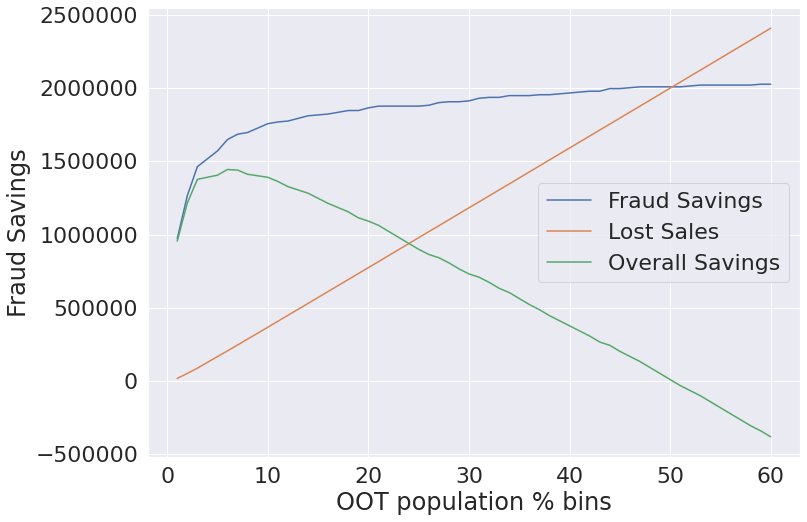

In [292]:
results = results.head(60)
g=sns.lineplot(y ='Fraud Savings',x='bin',data=results)
sns.lineplot(y='Lost Sales', x='bin', data=results)
sns.lineplot(y='Overall Savings', x='bin', data=results)
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
g.set_xlabel('OOT population % bins')
plt.legend(labels=['Fraud Savings', 'Lost Sales', 'Overall Savings'])

In [11]:
cols = ['card_zip_total_7',
                        'card_state_max_7',
                        'amount_bin_card_total_7',
                        'Cardnum_total_3',
                        'card_merch_total_1', 
                        'card_zip_max_14',
                        'card_state_avg_3',
                        'card_zip_total_1',
                        'card_state_avg_7',
                        'Cardnum_total_0',
                        'card_merch_total_7',
                        'Cardnum_total_7', 
                        'card_merch_max_1', 
                        'merch_state_total_3', 
                        'card_zip_total_0', 
                        'card_merch_total_3', 
                        'card_merch_max_30', 
                        'Cardnum_max_14', 
                        'merch_zip_total_1', 
                        'Merchnum_total_3', 
                        'merch_zip_total_7', 
                        'amount_bin_merch_total_0', 
                        'card_state_max_14', 
                        'card_state_total_3', 
                        'card_zip_total_30', 
                         'card_state_max_1', 
                         'Cardnum_max_3', 
                         'card_zip_max_30',
                         'amount_bin_merch_total_7',
                         'amount_bin_card_total_3']

In [275]:
model_1_data = model_data[model_data.Cardnum == 5142235211]
model_1 = model_1_data[cols]

model_1['predict'] = model.predict_proba(model_1)[:, 1]
model_1['Fraud'] = model_1_data['Fraud']
model_1['Date'] = pd.to_datetime(model_1_data.Date)
model_1 = model_1[model_1.Date>='2010-11-01']

<ipython-input-275-00e3e62bd351>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_1['predict'] = model.predict_proba(model_1)[:, 1]
<ipython-input-275-00e3e62bd351>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_1['Fraud'] = model_1_data['Fraud']
<ipython-input-275-00e3e62bd351>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

(array([14930., 14932., 14934., 14936., 14938., 14940., 14942., 14944.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

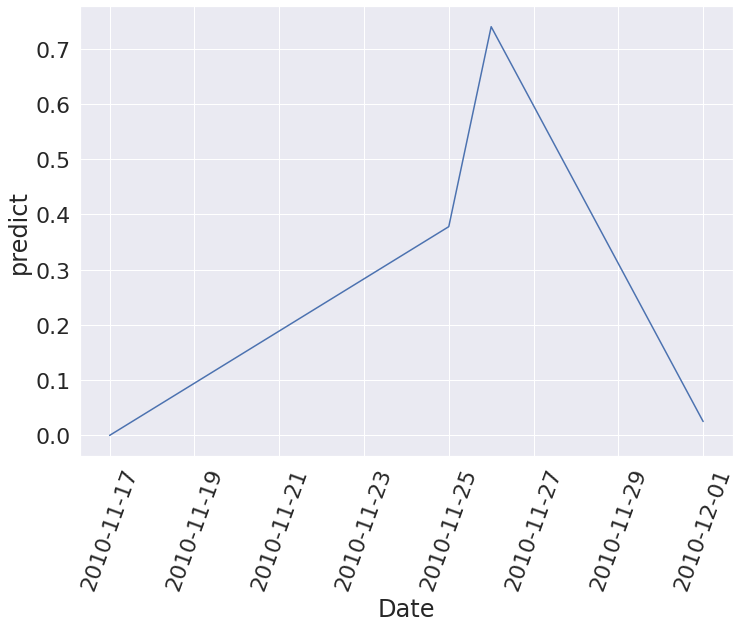

In [265]:
sns.lineplot(x='Date',y='predict',data=model_1, ci=None)
plt.xticks(rotation=70)

In [267]:
model_1['count'] = range(len(model_1))

(0.0, 34.0)

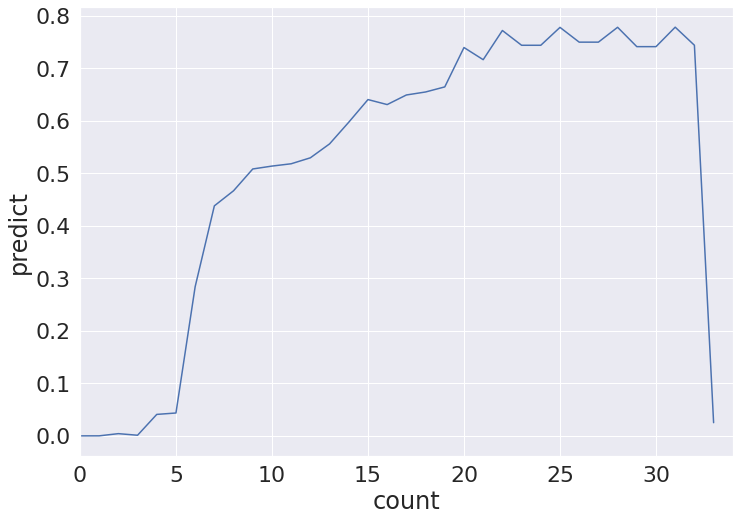

In [268]:
sns.lineplot(x='count',y='predict',data=model_1)
plt.xlim(0,len(model_1))
#plt.xticks(rotation=70)

<ipython-input-277-b06c73a2028d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_1['predict'] = model.predict_proba(model_1)[:, 1]
<ipython-input-277-b06c73a2028d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_1['Fraud'] = model_1_data['Fraud']
<ipython-input-277-b06c73a2028d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

(array([14738., 14740., 14742., 14744., 14746., 14748.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

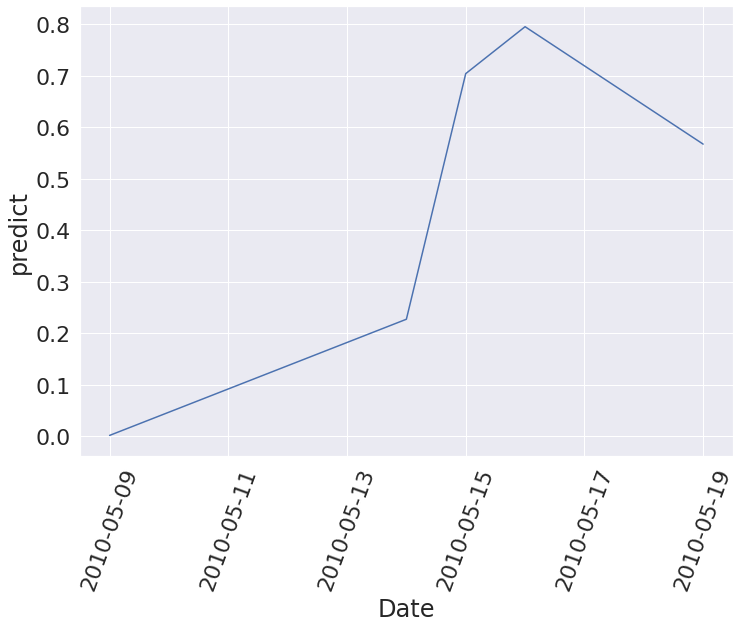

In [277]:
model_1_data = model_data[model_data.Merchnum == '4620009957157']
model_1 = model_1_data[cols]
model_1['predict'] = model.predict_proba(model_1)[:, 1]
model_1['Fraud'] = model_1_data['Fraud']
model_1['Date'] = pd.to_datetime(model_1_data.Date)
model_1 = model_1[(model_1.Date>='2010-05-01')&(model_1.Date<='2010-06-01')]
sns.lineplot(x='Date',y='predict',data=model_1, ci=None)
plt.xticks(rotation=70)

(0.0, 45.0)

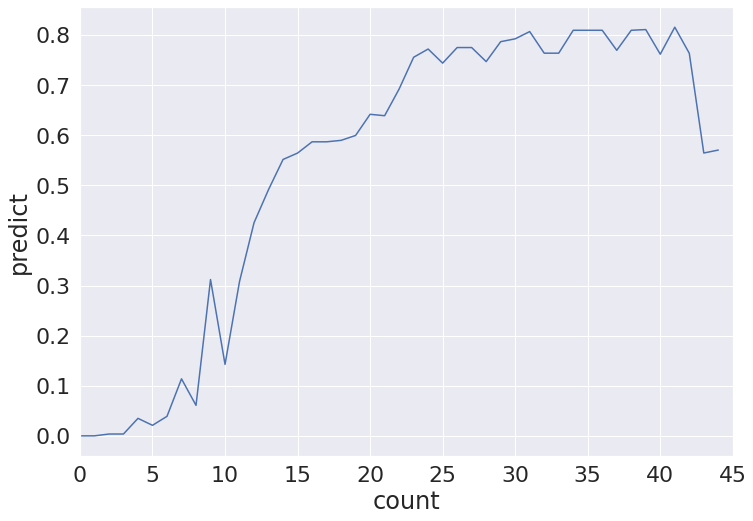

In [279]:
model_1['count'] = range(len(model_1))
sns.lineplot(x='count',y='predict',data=model_1)
plt.xlim(0,45)
#plt.xticks(rotation=70)

***--End of Report--***